<a href="https://colab.research.google.com/github/sowmini4901/CustomerChurnPrediction/blob/main/churnTravel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analysis of Customer Churn Prediction using Neural Networks.**

**Step 1:** Importing necessary frameworks and modules for the project

In [ ]:
pip install tensorflow


In [ ]:
#importing the necessary libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import os
from sklearn import preprocessing

In [ ]:
#conncecting to my google drive for dataset implementation
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Step 2:** Exploring the dataset

In [ ]:
#dataframe from the dataset in google drive
df=pd.read_csv('/content/gdrive/MyDrive/CustomertravelChurn.csv')
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [ ]:
df.info #summary of the dataset taken

<bound method DataFrame.info of      Age FrequentFlyer  ... BookedHotelOrNot  Target
0     34            No  ...              Yes       0
1     34           Yes  ...               No       1
2     37            No  ...               No       0
3     30            No  ...               No       0
4     30            No  ...               No       0
..   ...           ...  ...              ...     ...
949   31           Yes  ...               No       0
950   30            No  ...              Yes       0
951   37            No  ...               No       0
952   30            No  ...              Yes       0
953   31           Yes  ...               No       0

[954 rows x 7 columns]>

In [ ]:
df.shape #printing the number of rows and columns in the dataset

(954, 7)

**Step 3:** Configure dataset according to the implementation and project

In [ ]:
#viewing the datatypes of all columns
df.dtypes

Age                            int64
FrequentFlyer                 object
AnnualIncomeClass             object
ServicesOpted                  int64
AccountSyncedToSocialMedia    object
BookedHotelOrNot              object
Target                         int64
dtype: object

In [ ]:
#Age vs Target
churn_no=df[df.Target==0].Age
churn_yes=df[df.Target==1].Age
print(churn_no)

0      34
2      37
3      30
4      30
6      34
       ..
949    31
950    30
951    37
952    30
953    31
Name: Age, Length: 730, dtype: int64


In [ ]:
print(churn_yes)

1      34
5      27
7      34
9      36
11     28
       ..
921    36
929    28
933    30
937    30
945    30
Name: Age, Length: 224, dtype: int64


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


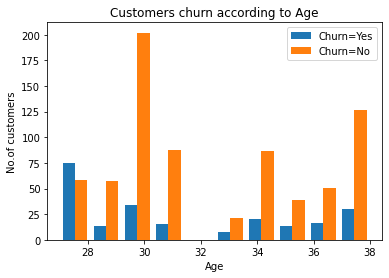

In [ ]:
#plotting the graph for visualizing
#customer churn according to Age period
plt.xlabel("Age")
plt.ylabel("No.of customers")
plt.title("Customers churn according to Age")
plt.hist([churn_yes,churn_no],label=['Churn=Yes','Churn=No'])
plt.legend()

In [ ]:
#Booked Hotel vs Annual Income
churn_no=df[df.BookedHotelOrNot=='No'].AnnualIncomeClass
churn_yes=df[df.BookedHotelOrNot=='Yes'].AnnualIncomeClass
print(churn_no)

1         Low Income
2      Middle Income
3      Middle Income
4         Low Income
7         Low Income
           ...      
946       Low Income
947    Middle Income
949       Low Income
951    Middle Income
953      High Income
Name: AnnualIncomeClass, Length: 576, dtype: object


In [ ]:
print(churn_yes)

0      Middle Income
5        High Income
6      Middle Income
8         Low Income
10        Low Income
           ...      
944    Middle Income
945      High Income
948    Middle Income
950    Middle Income
952       Low Income
Name: AnnualIncomeClass, Length: 378, dtype: object


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


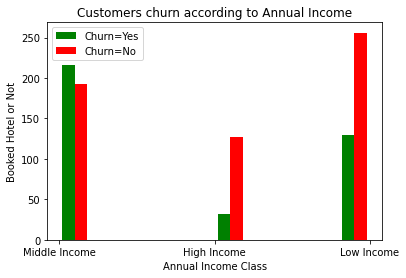

In [ ]:
#plotting the graph for visualizing
#customer churn according to Annual Income
plt.xlabel("Annual Income Class")
plt.ylabel("Booked Hotel or Not")
plt.title("Customers churn according to Annual Income")
plt.hist([churn_yes,churn_no],label=['Churn=Yes','Churn=No'],color=['green','red'])
plt.legend()

In [ ]:
#service opted vs Target
churn_no=df[df.Target==0].ServicesOpted
churn_yes=df[df.Target==1].ServicesOpted
print(churn_no)

0      6
2      3
3      2
4      1
6      4
      ..
949    1
950    5
951    4
952    1
953    1
Name: ServicesOpted, Length: 730, dtype: int64


In [ ]:
print(churn_yes)

1      5
5      1
7      2
9      1
11     2
      ..
921    1
929    1
933    1
937    5
945    6
Name: ServicesOpted, Length: 224, dtype: int64


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


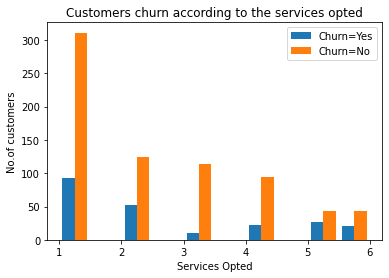

In [ ]:
#plotting the graph for visualizing
#customer churn according to service opted
plt.xlabel("Services Opted")
plt.ylabel("No.of customers")
plt.title("Customers churn according to the services opted")
plt.hist([churn_yes,churn_no],label=['Churn=Yes','Churn=No'])
plt.legend()

**Step 4:** Data Cleaning

In [ ]:
df.dtypes

Age                            int64
FrequentFlyer                 object
AnnualIncomeClass             object
ServicesOpted                  int64
AccountSyncedToSocialMedia    object
BookedHotelOrNot              object
Target                         int64
dtype: object

In [ ]:
#print columns with unique values
for column in df:
  print(f'{column} : {df[column].unique()}')

Age : [34 37 30 27 36 28 35 31 38 33 29]
FrequentFlyer : ['No' 'Yes' 'No Record']
AnnualIncomeClass : ['Middle Income' 'Low Income' 'High Income']
ServicesOpted : [6 5 3 2 1 4]
AccountSyncedToSocialMedia : ['No' 'Yes']
BookedHotelOrNot : ['Yes' 'No']
Target : [0 1]


In [ ]:
#printing the columns with string datatype
def print_unique_column_values(df):
    for column in df:
       if df[column].dtypes=='object': #print columns with string datatype
           print(f'{column} : {df[column].unique()}') 

In [ ]:
print_unique_column_values(df)

FrequentFlyer : ['No' 'Yes' 'No Record']
AnnualIncomeClass : ['Middle Income' 'Low Income' 'High Income']
AccountSyncedToSocialMedia : ['No' 'Yes']
BookedHotelOrNot : ['Yes' 'No']


In [ ]:
#replacing the values in the rows 
#replace function is used here to replace the values
df.replace('No Record','No',inplace=True)

In [ ]:
print_unique_column_values(df)

FrequentFlyer : ['No' 'Yes']
AnnualIncomeClass : ['Middle Income' 'Low Income' 'High Income']
AccountSyncedToSocialMedia : ['No' 'Yes']
BookedHotelOrNot : ['Yes' 'No']


In [ ]:
#machine learning models do not understand text so we need to change it to number.
#best is 0 and 1
#converting the yes/no to 1/0
yes_no_columns = ['FrequentFlyer','AccountSyncedToSocialMedia','BookedHotelOrNot']
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

In [ ]:
for col in df:
    print(f'{col}: {df[col].unique()}') 

Age: [34 37 30 27 36 28 35 31 38 33 29]
FrequentFlyer: [0 1]
AnnualIncomeClass: ['Middle Income' 'Low Income' 'High Income']
ServicesOpted: [6 5 3 2 1 4]
AccountSyncedToSocialMedia: [0 1]
BookedHotelOrNot: [1 0]
Target: [0 1]


In [ ]:
df.dtypes

Age                            int64
FrequentFlyer                  int64
AnnualIncomeClass             object
ServicesOpted                  int64
AccountSyncedToSocialMedia     int64
BookedHotelOrNot               int64
Target                         int64
dtype: object

In [ ]:
#performing one hot encoding
#creates dummy columns
df2=pd.get_dummies(data=df,columns=['AnnualIncomeClass'])
df2.columns

Index(['Age', 'FrequentFlyer', 'ServicesOpted', 'AccountSyncedToSocialMedia',
       'BookedHotelOrNot', 'Target', 'AnnualIncomeClass_High Income',
       'AnnualIncomeClass_Low Income', 'AnnualIncomeClass_Middle Income'],
      dtype='object')

In [ ]:
df2.shape

(954, 9)

In [ ]:
df2.dtypes

Age                                int64
FrequentFlyer                      int64
ServicesOpted                      int64
AccountSyncedToSocialMedia         int64
BookedHotelOrNot                   int64
Target                             int64
AnnualIncomeClass_High Income      uint8
AnnualIncomeClass_Low Income       uint8
AnnualIncomeClass_Middle Income    uint8
dtype: object

In [ ]:
#scaling we do for the columns which are not in the range(0,1)
#minmax scaler is used to convert the values between 0 and 1
scalingColumns=['Age','ServicesOpted']
from sklearn.preprocessing import MinMaxScaler #importing from sklearn
scaler=MinMaxScaler()
df2[scalingColumns]=scaler.fit_transform(df2[scalingColumns]) #used to train the data

In [ ]:
df2.head()

,Age,FrequentFlyer,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target,AnnualIncomeClass_High Income,AnnualIncomeClass_Low Income,AnnualIncomeClass_Middle Income
0,0.636364,0,1.0,0,1,0,0,0,1
1,0.636364,1,0.8,1,0,1,0,1,0
2,0.909091,0,0.4,1,0,0,0,0,1
3,0.272727,0,0.2,0,0,0,0,0,1
4,0.272727,0,0.0,0,0,0,0,1,0


**Step 5:** Making x and y datasets

In [ ]:
x=df2.drop('Target',axis='columns')
y=df2['Target']

In [ ]:
#we generally split data to training and testing dataset
#80% model training
#20% model fitting
#we can do that using train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [ ]:
x_train.shape

(763, 8)

In [ ]:
len(x_train.columns)

8

In [ ]:
x_train[:5]

,Age,FrequentFlyer,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,AnnualIncomeClass_High Income,AnnualIncomeClass_Low Income,AnnualIncomeClass_Middle Income
354,0.000000,0,0.0,0,1,0,0,1
902,0.909091,0,0.6,1,0,0,0,1
178,0.727273,0,0.0,0,0,0,1,0
440,0.909091,0,0.6,0,1,0,0,1
512,0.363636,0,0.4,1,1,0,1,0


In [ ]:
x_test.shape

(191, 8)

In [ ]:
x_test[:5]

,Age,FrequentFlyer,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,AnnualIncomeClass_High Income,AnnualIncomeClass_Low Income,AnnualIncomeClass_Middle Income
60,0.636364,0,1.0,0,1,0,0,1
804,0.181818,0,0.6,0,1,0,0,1
934,0.272727,0,0.0,0,0,0,1,0
619,1.000000,0,0.2,0,0,0,1,0
666,0.272727,0,0.0,1,1,0,1,0


**Step 6:** Building a neural network without Hidden layer

In [ ]:
#Basic artificial neural network without any hidden layers
#1 input layer and 1 output layer
model = keras.Sequential([
    keras.layers.Dense(5,input_shape=(8,),activation='sigmoid') 
]) 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
24/24 [==============================] - 0s 2ms/step - loss: 1.7968 - accuracy: 0.2228
Epoch 2/10
24/24 [==============================] - 0s 2ms/step - loss: 1.6928 - accuracy: 0.2464
Epoch 3/10
24/24 [==============================] - 0s 1ms/step - loss: 1.5959 - accuracy: 0.2752
Epoch 4/10
24/24 [==============================] - 0s 1ms/step - loss: 1.5063 - accuracy: 0.3028
Epoch 5/10
24/24 [==============================] - 0s 1ms/step - loss: 1.4224 - accuracy: 0.3539
Epoch 6/10
24/24 [==============================] - 0s 2ms/step - loss: 1.3445 - accuracy: 0.4220
Epoch 7/10
24/24 [==============================] - 0s 2ms/step - loss: 1.2731 - accuracy: 0.4679
Epoch 8/10
24/24 [==============================] - 0s 2ms/step - loss: 1.2067 - accuracy: 0.5125
Epoch 9/10
24/24 [==============================] - 0s 2ms/step - loss: 1.1458 - accuracy: 0.5387
Epoch 10/10
24/24 [==============================] - 0s 1ms/step - loss: 1.0895 - accuracy: 0.5858


In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 5)                 45        
                                                                 
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.evaluate(x_test,y_test) #evaluate

6/6 [==============================] - 0s 3ms/step - loss: 1.1011 - accuracy: 0.5759


[1.1011277437210083, 0.5759162306785583]

In [ ]:
predicted=model.predict(x_test)
predicted[:5] 

array([[0.5765592 , 0.40113974, 0.18483517, 0.1983102 , 0.41001406],
       [0.46941057, 0.4112713 , 0.23974195, 0.24534714, 0.52407116],
       [0.6230951 , 0.48225695, 0.31281397, 0.29181445, 0.33771604],
       [0.71680117, 0.4646906 , 0.22955826, 0.19738391, 0.2109935 ],
       [0.49917614, 0.34075   , 0.26527286, 0.22861078, 0.55372053]],
      dtype=float32)

In [ ]:
y_test[:15]

60     0
804    0
934    0
619    0
666    0
537    1
341    0
916    0
828    0
613    1
775    1
416    0
642    0
489    1
742    1
Name: Target, dtype: int64

Building Neural Network with Hidden Layer

In [ ]:
#Basic artificial neural network with 1 hidden layer
#1 input layer,1 hidden layer, 1 output layer
model1 = keras.Sequential([
    keras.layers.Dense(5,input_shape=(8,),activation='relu'), # input Layer
    keras.layers.Dense(3,activation='relu'), #hidden layer
    keras.layers.Dense(1,activation='sigmoid'), #output layer
])

model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
)
model1.fit(x_train,y_train,epochs=5,shuffle=True,batch_size=50)

Epoch 1/5
16/16 [==============================] - 1s 2ms/step - loss: 0.6452 - accuracy: 0.7720
Epoch 2/5
16/16 [==============================] - 0s 2ms/step - loss: 0.6286 - accuracy: 0.7720
Epoch 3/5
16/16 [==============================] - 0s 3ms/step - loss: 0.6096 - accuracy: 0.7720
Epoch 4/5
16/16 [==============================] - 0s 2ms/step - loss: 0.5911 - accuracy: 0.7720
Epoch 5/5
16/16 [==============================] - 0s 2ms/step - loss: 0.5738 - accuracy: 0.7720


In [ ]:
len(model1.layers)

3

In [ ]:
model1.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 5)                 45        
                                                                 
 dense_22 (Dense)            (None, 3)                 18        
                                                                 
 dense_23 (Dense)            (None, 1)                 4         
                                                                 
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.evaluate(x_test,y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.5761 - accuracy: 0.7382


[0.5760816335678101, 0.7382199168205261]

In [ ]:
pred=model1.predict(x_test)
pred[:5]

array([[0.3833407 ],
       [0.39981598],
       [0.32693607],
       [0.35338497],
       [0.3670587 ]], dtype=float32)

In [ ]:
y_test[:15]

60     0
804    0
934    0
619    0
666    0
537    1
341    0
916    0
828    0
613    1
775    1
416    0
642    0
489    1
742    1
Name: Target, dtype: int64

In [ ]:
yPred=[]
for element in pred:
    if element > 0.3:
        yPred.append(1)
    else:
        yPred.append(0)

In [ ]:
yPred[:20]

[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]

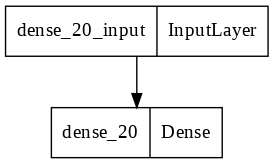

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', dpi=100)

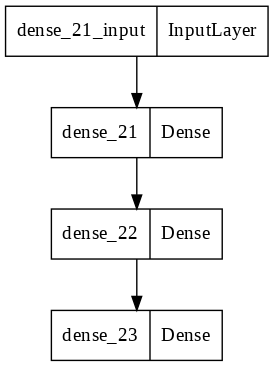

In [ ]:
tf.keras.utils.plot_model(model1, to_file='model1.png', dpi=100)

In [ ]:
#classification report
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,yPred))

              precision    recall  f1-score   support

           0       0.77      0.21      0.33       141
           1       0.27      0.82      0.41        50

    accuracy                           0.37       191
   macro avg       0.52      0.52      0.37       191
weighted avg       0.64      0.37      0.35       191



Text(69.0, 0.5, 'Truth')

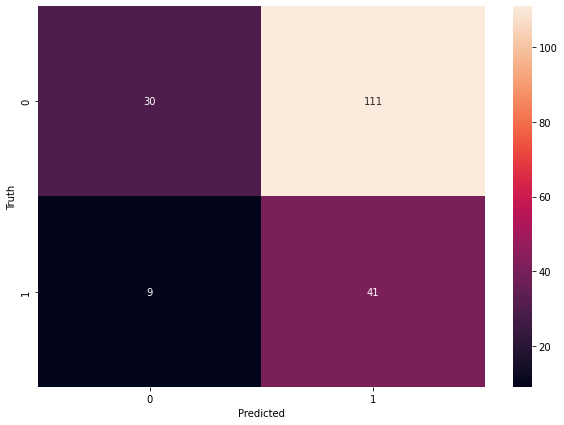

In [ ]:
# confusion matrix
import seaborn as sn
confusionmatrix = tf.math.confusion_matrix(labels=y_test,predictions=yPred)

plt.figure(figsize = (10,7))
sn.heatmap(confusionmatrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#accuracy is
round((46+23)/(46+4+118+23),2)

0.36

In [ ]:
#precision for 0 class
round(23/(4+23),2)

0.85

In [ ]:
#precision for 1 class
round(46/(118+46),2)

0.28

In [ ]:
#recall for 0 class
round(23/(23+118),2)

0.16

In [ ]:
#recall for 1 class
round(46/(4+46),2)

0.92